# MnMS Tutorial: Exploitation of GTFS Data

In [38]:
from gtfs_functions import Feed
from shapely.geometry import LineString, Point

In [30]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [36]:
import geopandas as gpd

## Read GTFS Data

In [2]:
gtfs_path = "gtfs-nl.zip"
feed = Feed(gtfs_path)

routes = feed.routes
stops = feed.stops
stop_times = feed.stop_times
trips = feed.trips
shapes = feed.shapes

INFO:root:Reading "routes.txt".
INFO:root:accessing trips
INFO:root:Start date is None. You should either specify a start date or set busiest_date to True.
INFO:root:Reading "trips.txt".
INFO:root:File "calendar.txt" not found.
INFO:root:Reading "calendar_dates.txt".
INFO:root:The busiest date/s of this feed or your selected date range is/are:  ['2022-09-16'] with 112743 trips.
INFO:root:In the case that more than one busiest date was found, the first one will be considered.
INFO:root:In this case is 2022-09-16.
INFO:root:Reading "stop_times.txt".
INFO:root:_trips is defined in stop_times
INFO:root:Reading "stops.txt".
INFO:root:computing patterns
INFO:root:Reading "shapes.txt".


### Routes

In [3]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color,route_url,route_name
0,81738,UOV,111,Vleuten - Kasteel De Haar,NaN,3,ffe600,000000,NaN,111 Vleuten - Kasteel De Haar
1,82576,BRENG,56,Heteren - Arnhem CS,NaN,3,NaN,NaN,NaN,56 Heteren - Arnhem CS
2,82578,OVREGIOY,974,Kampen Station Zuid - Genemuiden 't TAG,NaN,3,NaN,NaN,NaN,974 Kampen Station Zuid - Genemuiden 't TAG
3,82579,IFF:NS,Stopbus i.p.v. trein,Stopbus i.p.v. trein Assen <-> Groningen,NaN,3,NaN,NaN,NaN,Stopbus i.p.v. trein Stopbus i.p.v. trein Asse...
4,82580,IFF:NS,Stopbus i.p.v. trein,Stopbus i.p.v. trein Dordrecht <-> Rotterdam C...,NaN,3,NaN,NaN,NaN,Stopbus i.p.v. trein Stopbus i.p.v. trein Dord...


### Stops

In [4]:
stops.head()

,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code,zone_id,geometry
0,2324223,NaN,Oldenzaal,52.306278,6.933854,0,stoparea:17915,NaN,NaN,2,IFF:odz,POINT (6.93385 52.30628)
1,2324208,NaN,Nieuwerkerk ad IJssel,51.965284,4.616723,0,stoparea:18214,NaN,NaN,2,IFF:nwk,POINT (4.61672 51.96528)
2,939498,38320270,"Hauwert, Garage Balk",52.703838,5.094756,0,NaN,NaN,0.0,NaN,CXX:38320270,POINT (5.09476 52.70384)
3,2324529,NaN,Utrecht Centraal,52.090101,5.110365,0,stoparea:17843,NaN,NaN,4,IFF:ut,POINT (5.11036 52.09010)
4,387711,53950080,"Werkendam, Plein",51.813280,4.890084,0,stoparea:111202,NaN,1.0,NaN,NaN,POINT (4.89008 51.81328)


### Stop Times

In [5]:
stop_times.head()

,trip_id,route_id,route_name,service_id,direction_id,shape_id,stop_sequence,stop_id,stop_headsign,arrival_time,...,stop_name,stop_lat,stop_lon,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code,zone_id,geometry
0,157174285,17748,Sprinter Uitgeest <-> Rotterdam Centraal SPR4000,22,0,1034050,5,2324012,NaN,23520.0,...,Koog aan de Zaan,52.457768,4.805623,0,stoparea:194757,NaN,NaN,2,IFF:kz,POINT (4.80562 52.45777)
1,157174285,17748,Sprinter Uitgeest <-> Rotterdam Centraal SPR4000,22,0,1034050,23,2422141,NaN,29040.0,...,Rotterdam Centraal,51.925429,4.467602,0,stoparea:17894,NaN,NaN,16,IFF:rtd,POINT (4.46760 51.92543)
2,157174285,17748,Sprinter Uitgeest <-> Rotterdam Centraal SPR4000,22,0,1034050,4,2422419,NaN,23340.0,...,Zaandijk Zaanse Schans,52.469143,4.805097,0,stoparea:194756,NaN,NaN,2,IFF:zzs,POINT (4.80510 52.46914)
3,157174285,17748,Sprinter Uitgeest <-> Rotterdam Centraal SPR4000,22,0,1034050,6,2324748,NaN,23700.0,...,Zaandam,52.438391,4.813608,0,stoparea:17996,NaN,NaN,5,IFF:zd,POINT (4.81361 52.43839)
4,157174285,17748,Sprinter Uitgeest <-> Rotterdam Centraal SPR4000,22,0,1034050,8,2422582,NaN,24420.0,...,Amsterdam Centraal,52.378419,4.901213,0,stoparea:18188,NaN,NaN,4b,IFF:asd,POINT (4.90121 52.37842)


### Trips

In [6]:
trips.head()

,trip_id,route_id,pattern_id,route_pattern,pattern_name,route_name,service_id,direction_id,shape_id
0,157174285,17748,8b9971fa762ce25891,F,Sprinter Uitgeest <-> Rotterdam Centraal SPR40...,Sprinter Uitgeest <-> Rotterdam Centraal SPR4000,22,0,1034050
1,157186587,45194,aeef0179b07206d291,A,Sprinter Den Haag Centraal <-> Gouda Goverwell...,Sprinter Den Haag Centraal <-> Gouda Goverwell...,23,1,1034103
2,157186649,45194,aeef0179b07206d291,A,Sprinter Den Haag Centraal <-> Gouda Goverwell...,Sprinter Den Haag Centraal <-> Gouda Goverwell...,23,1,1034103
3,157187396,73489,45500b3e3e476fffac,A,Sprinter Den Haag Centraal <-> Tiel SPR6900 - ...,Sprinter Den Haag Centraal <-> Tiel SPR6900,23,0,1034106
4,157186605,45194,4be1df4267eac1d66f,A,Sprinter Den Haag Centraal <-> Gouda Goverwell...,Sprinter Den Haag Centraal <-> Gouda Goverwell...,23,0,1034104


### Shapes

In [7]:
shapes.head()

,shape_id,geometry
0,1001732,"LINESTRING (6.65565 52.35760, 6.65581 52.35744..."
1,1001733,"LINESTRING (6.52693 52.11702, 6.52691 52.11702..."
2,1001736,"LINESTRING (6.89521 52.21744, 6.89601 52.21742..."
3,1001747,"LINESTRING (6.65580 52.35756, 6.65597 52.35740..."
4,1003793,"LINESTRING (5.97098 52.20957, 5.97071 52.20949..."


### Calculate Stop Frequencies

In [8]:
time_windows = [0, 6, 9, 15.5, 19, 22, 24]

feed = Feed(gtfs_path, time_windows=time_windows)
stop_freq = feed.stops_freq
stop_freq.head()

INFO:root:Reading "stop_times.txt".
INFO:root:get trips in stop_times
INFO:root:accessing trips
INFO:root:Reading "routes.txt".
INFO:root:Start date is None. You should either specify a start date or set busiest_date to True.
INFO:root:Reading "trips.txt".
INFO:root:File "calendar.txt" not found.
INFO:root:Reading "calendar_dates.txt".
INFO:root:The busiest date/s of this feed or your selected date range is/are:  ['2022-09-16'] with 112743 trips.
INFO:root:In the case that more than one busiest date was found, the first one will be considered.
INFO:root:In this case is 2022-09-16.
INFO:root:Reading "stop_times.txt".
INFO:root:_trips is defined in stop_times
INFO:root:Reading "stops.txt".
INFO:root:computing patterns


,stop_id,direction_id,window,ntrips,min_per_trip,stop_name,geometry
0,1013214,1,15:30-19:00,7,30,"Assen, Triade",POINT (6.55816 52.99804)
1,1013214,1,19:00-22:00,4,45,"Assen, Triade",POINT (6.55816 52.99804)
2,1013214,1,22:00-24:00,2,60,"Assen, Triade",POINT (6.55816 52.99804)
3,1013214,1,6:00-9:00,6,30,"Assen, Triade",POINT (6.55816 52.99804)
4,1013214,1,9:00-15:30,13,30,"Assen, Triade",POINT (6.55816 52.99804)


### Calculate Line Frequencies

In [9]:
line_freq = feed.lines_freq
line_freq.head()

INFO:root:Reading "shapes.txt".


,route_id,route_name,direction_id,window,min_per_trip,ntrips,geometry
0,102,47 Geldermalsen - Gorinchem,0,15:30-19:00,42,5,"LINESTRING (5.27080 51.88161, 5.27077 51.88161..."
1,102,47 Geldermalsen - Gorinchem,0,19:00-22:00,60,3,"LINESTRING (5.27080 51.88161, 5.27077 51.88161..."
2,102,47 Geldermalsen - Gorinchem,0,22:00-24:00,120,1,"LINESTRING (5.27080 51.88161, 5.27077 51.88161..."
3,102,47 Geldermalsen - Gorinchem,0,6:00-9:00,36,5,"LINESTRING (5.27080 51.88161, 5.27077 51.88161..."
4,102,47 Geldermalsen - Gorinchem,0,9:00-15:30,39,10,"LINESTRING (5.27080 51.88161, 5.27077 51.88161..."


### Cut the Shapes into Segments

In [10]:
segments_gdf = feed.segments
segments_gdf.head()

INFO:root:Getting segments...
INFO:root:Projecting stops onto shape...
INFO:root:Interpolating stops onto shape...
INFO:root:Sorting shape points and stops...
INFO:root:segments_df: 104652, geometry: 104652


,shape_id,route_id,route_name,direction_id,stop_sequence,segment_name,start_stop_name,end_stop_name,segment_id,start_stop_id,end_stop_id,distance_m,geometry
0,1001732,75520,95 Almelo - Borculo,0,1,"Almelo, Centraal Station - Almelo, Centrumplein","Almelo, Centraal Station","Almelo, Centrumplein",2404093 - 2427500,2404093,2427500,778.852185,"LINESTRING (6.65565 52.35760, 6.65581 52.35744..."
1,1001732,75520,95 Almelo - Borculo,0,2,"Almelo, Centrumplein - Almelo, Bellavistastraat","Almelo, Centrumplein","Almelo, Bellavistastraat",2427500 - 2404104,2427500,2404104,487.258118,"LINESTRING (6.66223 52.35522, 6.66223 52.35522..."
2,1001732,75520,95 Almelo - Borculo,0,3,"Almelo, Bellavistastraat - Almelo, Egbert ten ...","Almelo, Bellavistastraat","Almelo, Egbert ten Catelaan",2404104 - 2336371,2404104,2336371,689.884547,"LINESTRING (6.65590 52.35503, 6.65596 52.35514..."
3,1001732,75520,95 Almelo - Borculo,0,4,"Almelo, Egbert ten Catelaan - Wierden, Aadorpsweg","Almelo, Egbert ten Catelaan","Wierden, Aadorpsweg",2336371 - 2336467,2336371,2336467,3107.498808,"LINESTRING (6.64615 52.35553, 6.64615 52.35553..."
4,1001732,75520,95 Almelo - Borculo,0,5,"Wierden, Aadorpsweg - Wierden, Akeleistraat","Wierden, Aadorpsweg","Wierden, Akeleistraat",2336467 - 2336465,2336467,2336465,415.499772,"LINESTRING (6.60521 52.35650, 6.60510 52.35648..."


### Calculate Segments Speeds

In [11]:
speeds = feed.avg_speeds
speeds.head()

INFO:root:adding runtime
INFO:root:adding distance in meters
INFO:root:calculating speed in km/h
INFO:root:fixing outliers
INFO:root:aggregating speed by segment and window


,route_id,route_name,direction_id,stop_sequence,segment_name,window,speed_kmh,avg_route_speed_kmh,segment_max_speed_kmh,runtime_sec,start_stop_name,end_stop_name,segment_id,start_stop_id,end_stop_id,shape_id,distance_m,geometry
0,102,47 Geldermalsen - Gorinchem,0,1,"Geldermalsen, Station - Meteren, Kalenberg",15:30-19:00,42.0,39.7,42.0,240.0,"Geldermalsen, Station","Meteren, Kalenberg",3002 - 4283,3002,4283,1047347,2767.453897,"LINESTRING (5.27080 51.88161, 5.27077 51.88161..."
1,102,47 Geldermalsen - Gorinchem,0,2,"Meteren, Kalenberg - Meteren, Landbouwhuis",15:30-19:00,67.0,39.7,67.0,60.0,"Meteren, Kalenberg","Meteren, Landbouwhuis",4283 - 3993,4283,3993,1047347,1111.453207,"LINESTRING (5.28839 51.87121, 5.28839 51.87121..."
2,102,47 Geldermalsen - Gorinchem,0,3,"Meteren, Landbouwhuis - Meteren, Rijweg",15:30-19:00,42.0,39.7,42.0,180.0,"Meteren, Landbouwhuis","Meteren, Rijweg",3993 - 3542,3993,3542,1047347,2077.306630,"LINESTRING (5.28335 51.86234, 5.28334 51.86234..."
3,102,47 Geldermalsen - Gorinchem,0,4,"Meteren, Rijweg - Waardenburg, Busstation",15:30-19:00,58.0,39.7,58.0,120.0,"Meteren, Rijweg","Waardenburg, Busstation",3542 - 2475741,3542,2475741,1047347,1934.774568,"LINESTRING (5.26836 51.84637, 5.26840 51.84636..."
4,102,47 Geldermalsen - Gorinchem,0,5,"Waardenburg, Busstation - Waardenburg, Achterweg",15:30-19:00,45.0,39.7,45.0,60.0,"Waardenburg, Busstation","Waardenburg, Achterweg",2475741 - 3605,2475741,3605,1047347,744.968137,"LINESTRING (5.25945 51.83259, 5.25945 51.83259..."


### Calculate Segment Frequencies

In [12]:
segments_freq = feed.segments_freq
segments_freq.head()

INFO:root:adding data for all lines.


,route_id,route_name,direction_id,segment_name,start_stop_name,end_stop_name,window,min_per_trip,ntrips,start_stop_id,end_stop_id,segment_id,geometry
0,102,47 Geldermalsen - Gorinchem,0,"Gorinchem, Walstraat - Gorinchem, Walstraat","Gorinchem, Walstraat","Gorinchem, Walstraat",15:30-19:00,35,6,1355970,1355970,1355970 - 1355970,"LINESTRING (4.97602 51.83255, 4.97602 51.83255)"
1,102,47 Geldermalsen - Gorinchem,0,"Gorinchem, Walstraat - Gorinchem, Merwedekanaal","Gorinchem, Walstraat","Gorinchem, Merwedekanaal",15:30-19:00,35,6,1355970,1355972,1355970 - 1355972,"LINESTRING (4.97602 51.83255, 4.97602 51.83255..."
2,102,47 Geldermalsen - Gorinchem,0,"Gorinchem, Walstraat - Gorinchem, Walstraat","Gorinchem, Walstraat","Gorinchem, Walstraat",19:00-22:00,60,3,1355970,1355970,1355970 - 1355970,"LINESTRING (4.97602 51.83255, 4.97602 51.83255)"
3,102,47 Geldermalsen - Gorinchem,0,"Gorinchem, Walstraat - Gorinchem, Merwedekanaal","Gorinchem, Walstraat","Gorinchem, Merwedekanaal",19:00-22:00,60,3,1355970,1355972,1355970 - 1355972,"LINESTRING (4.97602 51.83255, 4.97602 51.83255..."
4,102,47 Geldermalsen - Gorinchem,0,"Gorinchem, Walstraat - Gorinchem, Walstraat","Gorinchem, Walstraat","Gorinchem, Walstraat",22:00-24:00,120,1,1355970,1355970,1355970 - 1355970,"LINESTRING (4.97602 51.83255, 4.97602 51.83255)"


### Plot stops coordinates

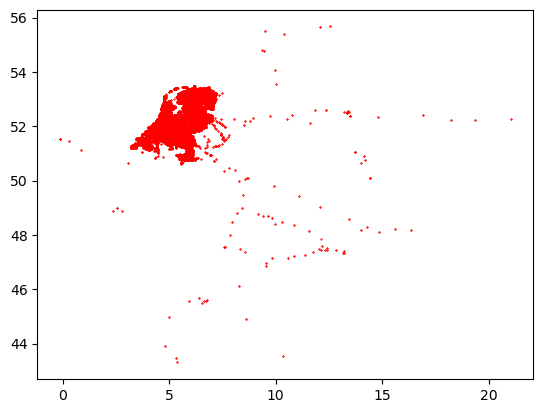

In [42]:
stops_coords = stops["geometry"]
points = []

for sc in stops_coords:
    points.append(Point(sc))

xs = [point.x for point in points]
ys = [point.y for point in points]
    
plt.scatter(xs, ys, color="red", s=0.1)
    
plt.show()

### Histogram with Stop Frequencies

In [28]:
px.histogram(
    stop_freq.loc[stop_freq.min_per_trip<50],
    x="min_per_trip",
    title="Stop frequencies",
    template="simple_white",
    nbins = 8)

### HeatMap with Scheduled Speeds

HeatMap with scheduled speeds per segment for one specific route and direction.

In [35]:
dir_0 = speeds.loc[(speeds.direction_id=='0')&(speeds.route_name=='47 Geldermalsen - Gorinchem')].sort_values(by='stop_sequence') 
dir_0['hour'] = dir_0.window.apply(lambda x: int(x.split(':')[0]))
dir_0.sort_values(by='hour', ascending=True, inplace=True)

fig = go.Figure(data = go.Heatmap(
                           z = dir_0.speed_kmh,
                           y = dir_0.start_stop_name,
                           x = dir_0.window,
                           hoverongaps = False,
                           colorscale = px.colors.colorbrewer.RdYlBu, 
                           reversescale = False
))

fig.update_yaxes(title_text='Stop', autorange='reversed')
fig.update_xaxes(title_text='Hour of day', side='top')
fig.update_layout(showlegend=False, height=600, width=1000,
                 title='Speed heatmap per direction and hour of the day')

fig.show()